<a href="https://colab.research.google.com/github/MuhammadRhakan/alternative/blob/main/1_Alternate_Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub
import time
import math
import spacy

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from kagglehub import KaggleDatasetAdapter
from sklearn.preprocessing import normalize
from datetime import datetime

In [ ]:
course = kagglehub.load_dataset(KaggleDatasetAdapter.PANDAS, "andrewmvd/udemy-courses", "udemy_courses.csv")
course.shape

<ipython-input-2-2997354014>:1: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  course = kagglehub.load_dataset(KaggleDatasetAdapter.PANDAS, "andrewmvd/udemy-courses", "udemy_courses.csv")


(3678, 12)

In [ ]:
course.head(3)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance


In [ ]:
course.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3678 non-null   int64  
 1   course_title         3678 non-null   object 
 2   url                  3678 non-null   object 
 3   is_paid              3678 non-null   bool   
 4   price                3678 non-null   int64  
 5   num_subscribers      3678 non-null   int64  
 6   num_reviews          3678 non-null   int64  
 7   num_lectures         3678 non-null   int64  
 8   level                3678 non-null   object 
 9   content_duration     3678 non-null   float64
 10  published_timestamp  3678 non-null   object 
 11  subject              3678 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 319.8+ KB


In [ ]:
#check unique values for each column
print(course.nunique().reset_index().set_axis(['Features', 'Unique Values'], axis=1).to_markdown(tablefmt='outline'))

+----+---------------------+-----------------+
|    | Features            |   Unique Values |
+====+=====================+=================+
|  0 | course_id           |            3672 |
|  1 | course_title        |            3663 |
|  2 | url                 |            3672 |
|  3 | is_paid             |               2 |
|  4 | price               |              38 |
|  5 | num_subscribers     |            2197 |
|  6 | num_reviews         |             511 |
|  7 | num_lectures        |             229 |
|  8 | level               |               4 |
|  9 | content_duration    |             105 |
| 10 | published_timestamp |            3672 |
| 11 | subject             |               4 |
+----+---------------------+-----------------+


In [ ]:
def duplicate_check(data):
  print("\n📌 Checking for Duplicate Values")
  print("-" * 45)

  duplicated_rows = data.duplicated().sum()
  if data.duplicated().any():
    print("\n⚠️ Duplicate values found! Cleaning up...")
    print("🔄 Removing duplicates...")
    data = data.drop_duplicates()
    print(f"✅ Done! {duplicated_rows} duplicates have been removed.\n")
  else:
    print("\n✅ No duplicate values found. Data is clean!\n")

  print("-" * 45)

  return data

course_no_duplicate = duplicate_check(course)


📌 Checking for Duplicate Values
---------------------------------------------

⚠️ Duplicate values found! Cleaning up...
🔄 Removing duplicates...
✅ Done! 6 duplicates have been removed.

---------------------------------------------


In [ ]:
def missing_values_check(data):
  print("\n📌 Automatically Checking for Missing Values")
  print("🔄 Showing missing values...\n")

  percentage = (data.isnull().sum() / data.shape[0]) * 100
  missing_values = pd.DataFrame({
      'Features': data.columns,
      'Missing Values': data.isnull().sum(),
      'Percentage': [f'{round(value,2)}%' for value in percentage]
      })
  missing_values.reset_index(drop=True, inplace=True)

  print(missing_values.to_markdown(tablefmt='pipe', index=False))
  print(f'\nData Shape:  {data.shape}')

missing_values_check(course_no_duplicate)


📌 Automatically Checking for Missing Values
🔄 Showing missing values...

| Features            |   Missing Values | Percentage   |
|:--------------------|-----------------:|:-------------|
| course_id           |                0 | 0.0%         |
| course_title        |                0 | 0.0%         |
| url                 |                0 | 0.0%         |
| is_paid             |                0 | 0.0%         |
| price               |                0 | 0.0%         |
| num_subscribers     |                0 | 0.0%         |
| num_reviews         |                0 | 0.0%         |
| num_lectures        |                0 | 0.0%         |
| level               |                0 | 0.0%         |
| content_duration    |                0 | 0.0%         |
| published_timestamp |                0 | 0.0%         |
| subject             |                0 | 0.0%         |

Data Shape:  (3672, 12)


In [ ]:
def remove_null(data):
  null_values = data[(data['num_lectures'] == 0) | (data['content_duration'] == 0)].index
  course_dropna = data.replace({
      'num_lectures': {0: data['num_lectures'].mean()},
      'content_duration': {0: data['content_duration'].median()}})

  print(f'Data after cleaning:  {course_dropna.shape}')

  return course_dropna

course_dropna = remove_null(course_no_duplicate)

Data after cleaning:  (3672, 12)


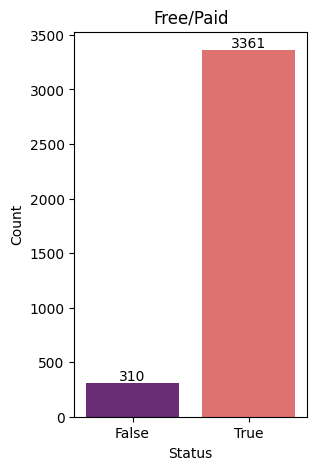

In [ ]:
def language_distribution(data, feature):
  plt.figure(figsize=(3,5))
  graph = sns.countplot(x=feature, data=data, width=0.8, palette='magma', hue=feature, legend=False)

  for bar in graph.containers:
    plt.bar_label(bar, label_type='edge')

  plt.title('Free/Paid')
  plt.xlabel('Status')
  plt.ylabel('Count')

  plt.show()

language_distribution(course_dropna, feature='is_paid')

In [ ]:
def numeric_attributes(data):
  numerics = []
  print(f"Numeric Attributes:")
  for i, num in enumerate(data.select_dtypes(include = 'number').drop(columns='course_id').columns.values):
    numerics.append(num)
    print(f"{i+1}. {num}")

  return numerics

numerics = numeric_attributes(course_dropna)

Numeric Attributes:
1. price
2. num_subscribers
3. num_reviews
4. num_lectures
5. content_duration


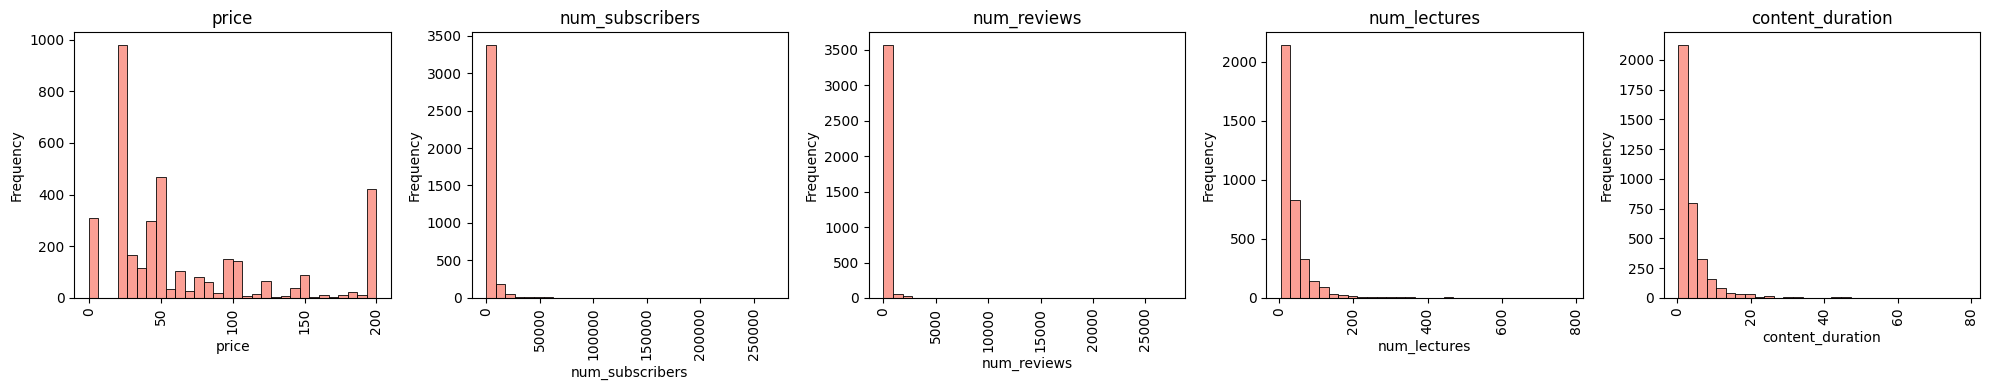

In [ ]:
def histogram(data, numeric):
    num_cols = len(numeric)
    fig, axes = plt.subplots(1, num_cols, figsize=(num_cols*4, 4))

    for i, col in enumerate(numeric):
      sns.histplot(data[col], bins=30, color='salmon', ax=axes[i])
      axes[i].set_title(col)
      axes[i].set_ylabel('Frequency')
      axes[i].tick_params(axis='x', rotation=90)

    plt.tight_layout()
    plt.show()

histogram(course_dropna, numerics)

In [ ]:
def boxplot(data, numeric, title, color):
  fig, axes = plt.subplots(1, len(numeric), figsize=(len(numeric)*4, 4))
  fig.suptitle(f'{title} Distriution')

  for i, col in enumerate(numeric):
    sns.boxplot(y=data[col], color=color, ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_ylabel('Value')
    axes[i].tick_params(axis='x', rotation=90)

  plt.tight_layout()
  plt.show()


def outliers_handling(data, features, method, par):
  data_cleaned = data.copy()

  if method == 'trim':
    mask = pd.Series(False, index=data.index)
    for col in features:
      Q1 = data[col].quantile(1-par)
      Q3 = data[col].quantile(par)
      IQR = Q3 - Q1
      lower = Q1 - 1.5 * IQR
      upper = Q3 + 1.5 * IQR
      mask |= (data[col] < lower) | (data[col] > upper)
    data_cleaned = data_cleaned[~mask]

  elif method == 'clip':
    for col in features:
      upper = data[col].quantile(par)
      data_cleaned[col] = data_cleaned[col].clip(upper=upper)

  else:
    raise ValueError("Method must be 'trim' or 'clip'")

  return data_cleaned


def compare_data(data, features, method, par):
  cleaned = outliers_handling(data, features, method, par)
  transformed = cleaned.copy()

  transformed[features] = np.sqrt(transformed[features])

  #visualizations
  boxplot(data, features, 'Original', 'wheat')
  boxplot(cleaned, features, f'After {method.capitalize()}', color='skyblue')
  boxplot(transformed, features, 'Transformed', color='salmon')

  return cleaned, transformed

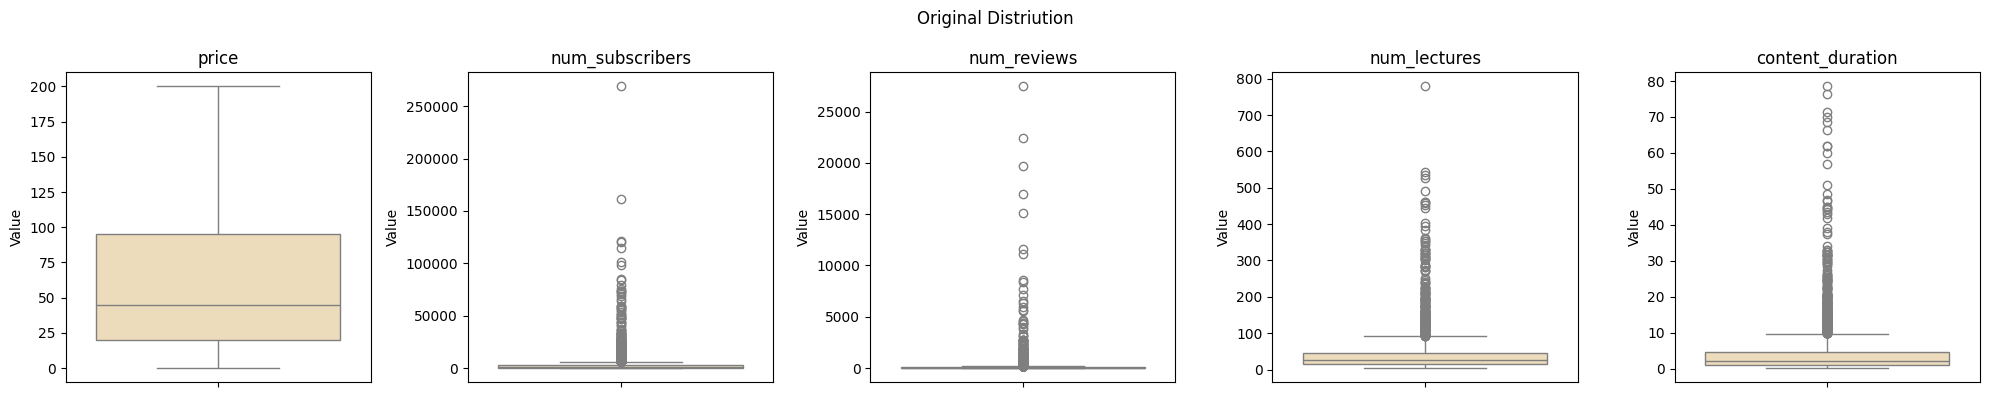

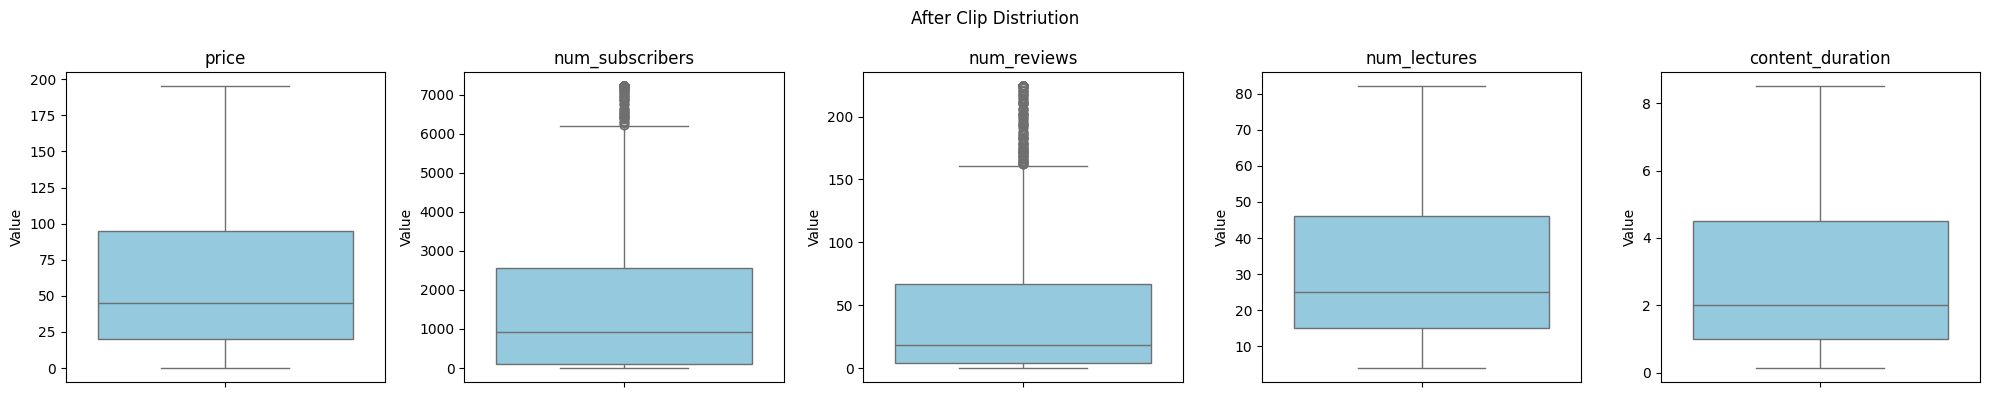

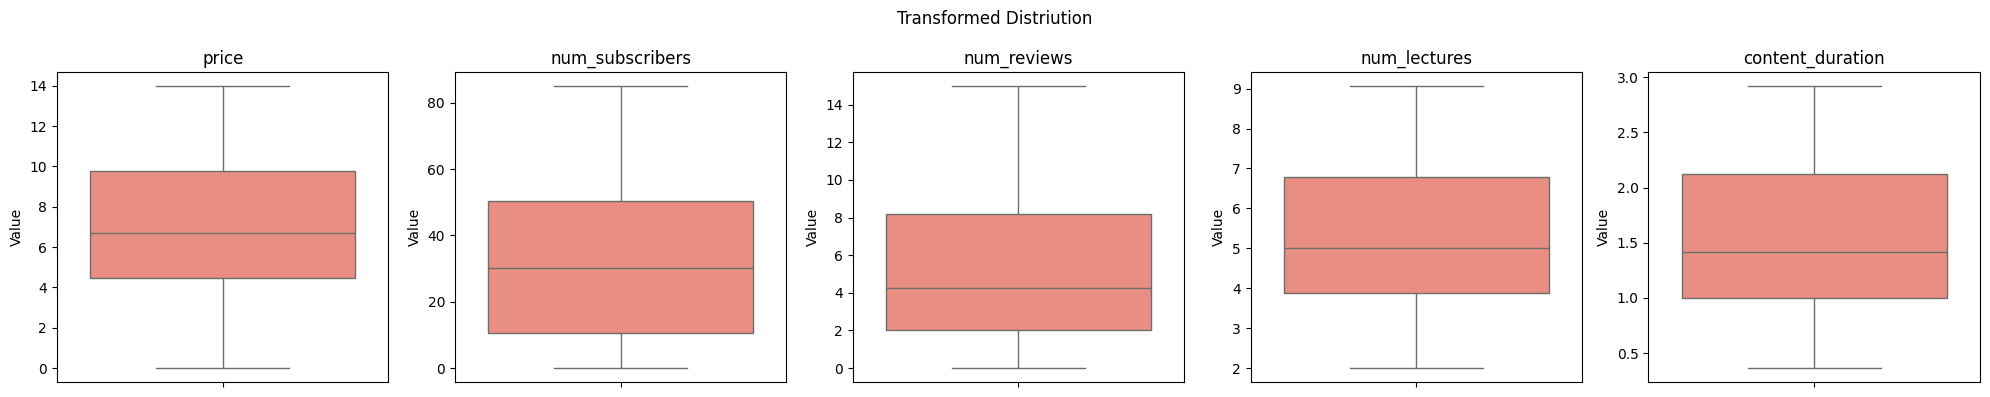

In [ ]:
clipped, _ = compare_data(course_dropna, numerics, 'clip', par=0.9)

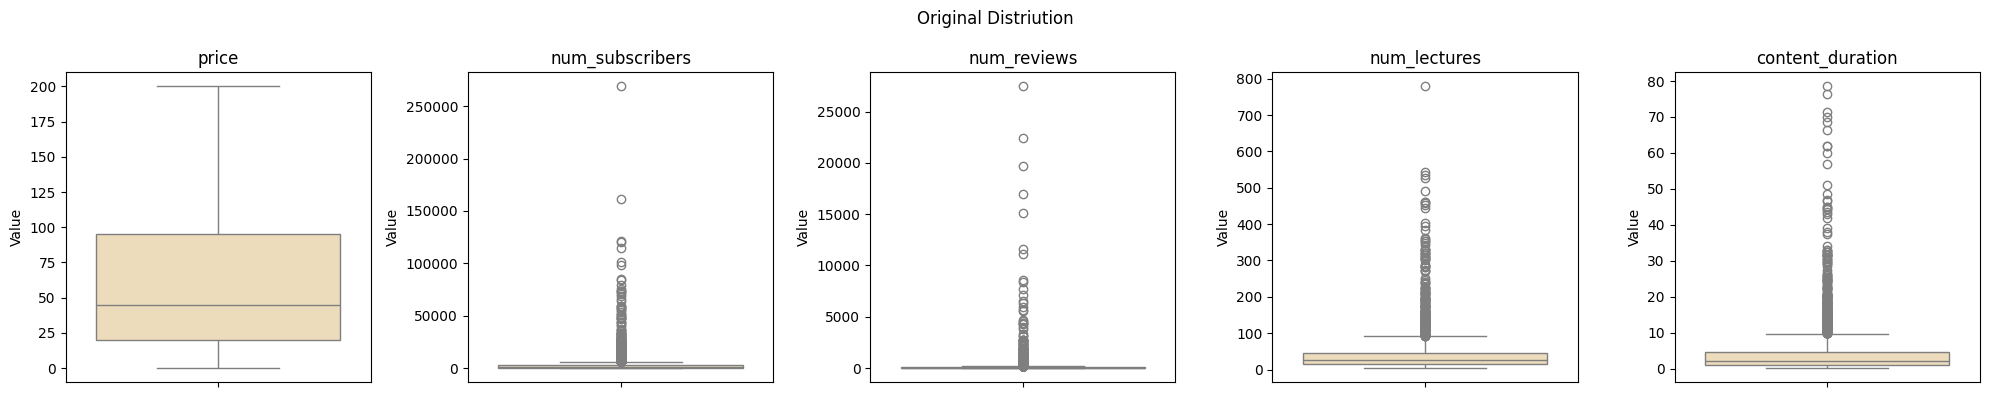

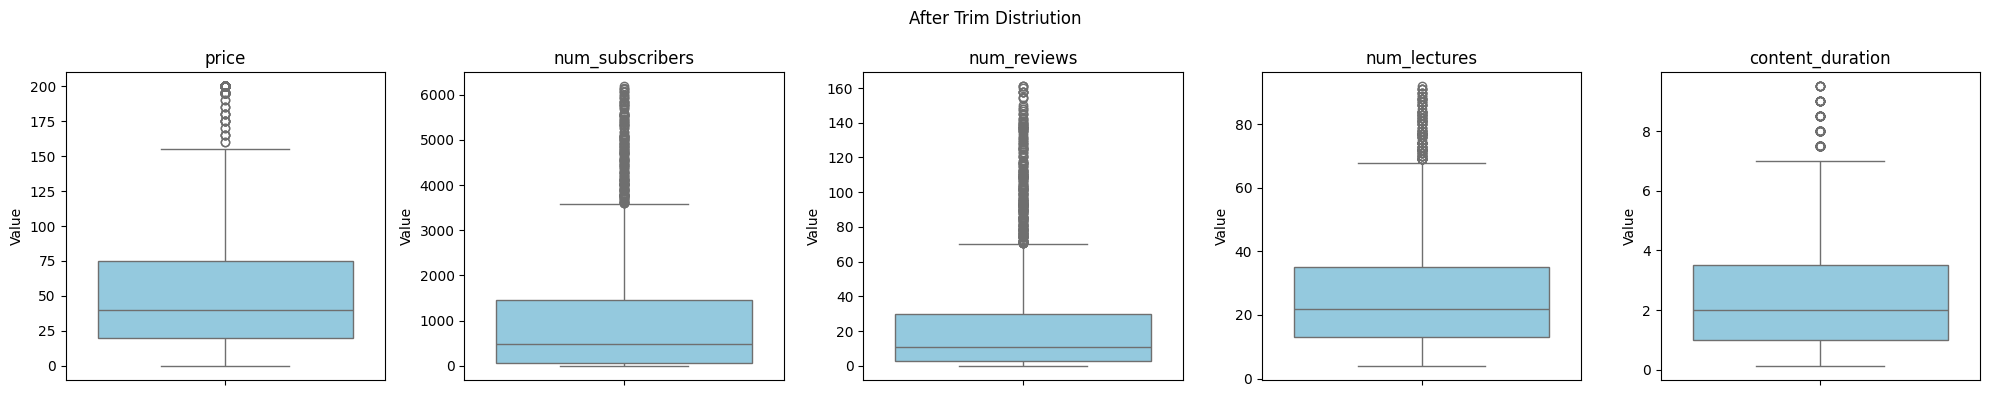

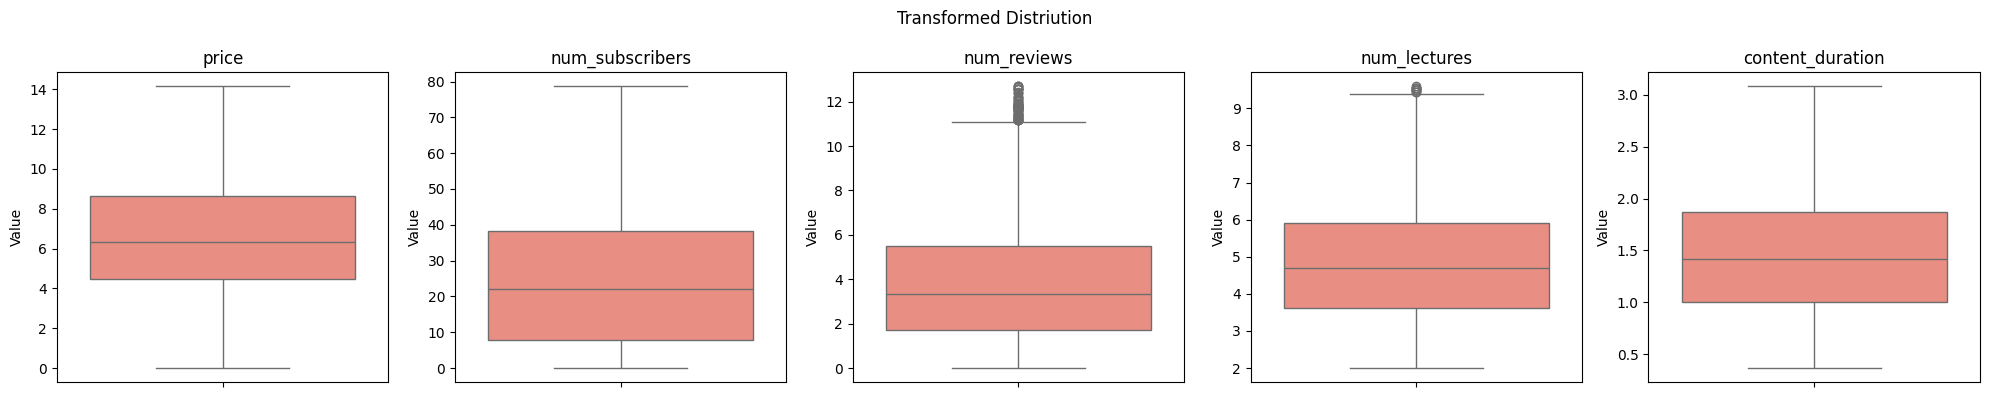

In [ ]:
cleaned, transformed = compare_data(course_dropna, numerics, 'trim', par=0.75)

In [ ]:
def basic_statistics(data, features=numerics):
  table = data[features].describe().T
  table['IQR'] = table['75%'] - table['25%']
  table['upper bound'] = table['75%'] + 1.5 * table['IQR']
  table['lower bound'] = table['25%'] - 1.5 * table['IQR']
  table = table.round(2)

  return table

def comparison():
  stats = {
    'Original': basic_statistics(course_dropna),
    'Cleaned': basic_statistics(cleaned),
    'Transformed': basic_statistics(transformed)}

  for key,values in stats.items():
    print(f"{key}\n{values.to_markdown(tablefmt='fancy_grid')}\n")

comparison()

Original
╒══════════════════╤═════════╤═════════╤═════════╤═══════╤═══════╤═══════╤════════╤══════════╤════════╤═══════════════╤═══════════════╕
│                  │   count │    mean │     std │   min │   25% │   50% │    75% │      max │    IQR │   upper bound │   lower bound │
╞══════════════════╪═════════╪═════════╪═════════╪═══════╪═══════╪═══════╪════════╪══════════╪════════╪═══════════════╪═══════════════╡
│ price            │    3671 │   66.12 │   61.04 │  0    │    20 │    45 │   95   │    200   │   75   │        207.5  │        -92.5  │
├──────────────────┼─────────┼─────────┼─────────┼───────┼───────┼───────┼────────┼──────────┼────────┼───────────────┼───────────────┤
│ num_subscribers  │    3671 │ 3191.46 │ 9489.25 │  0    │   112 │   912 │ 2550.5 │ 268923   │ 2438.5 │       6208.25 │      -3545.75 │
├──────────────────┼─────────┼─────────┼─────────┼───────┼───────┼───────┼────────┼──────────┼────────┼───────────────┼───────────────┤
│ num_reviews      │    3671 │  156.41 

In [ ]:
def heatmap(data, features):
  corr = data[features].corr().round(2)
  mask = np.triu(np.ones_like(corr, dtype=bool))
  corr_masked = corr.mask(mask)

  fig = px.imshow(
      corr_masked,
      text_auto=True,
      aspect="auto",
      color_continuous_scale="RdBu_r",
      zmin=-1,
      zmax=1)

  fig.update_layout(
      title="Feature Correlation Heatmap",
      width=800,
      height=600,
      margin=dict(l=50, r=50, t=50, b=50),
      xaxis_tickangle=0,
      font=dict(size=10))

  fig.show()

heatmap(cleaned, numerics)

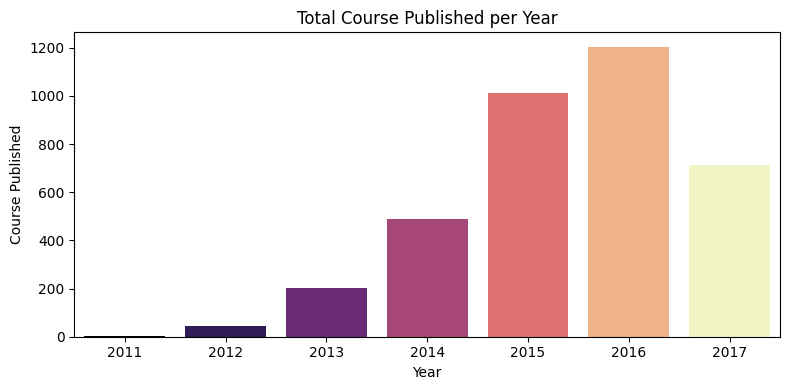

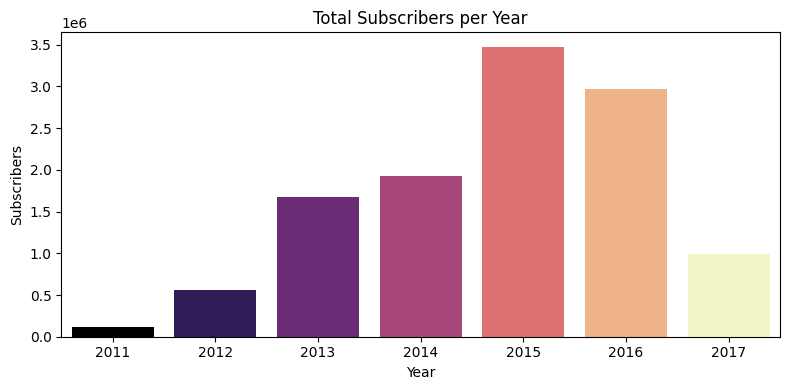

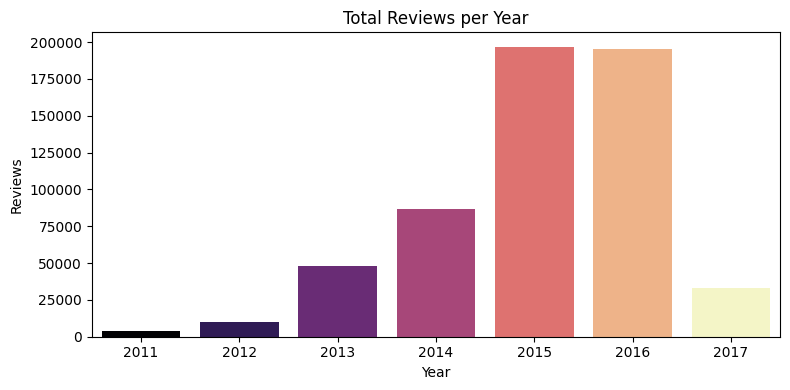

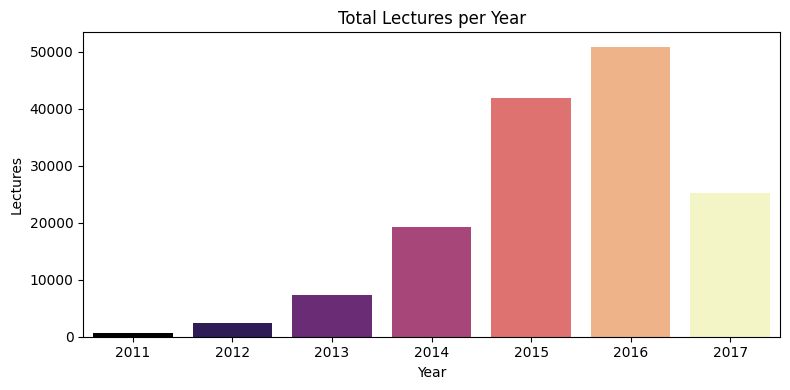

In [ ]:
def datetime_convert(data, feature):
  data = data.copy()
  latest_date = '2022-10-10'
  latest_date = pd.to_datetime(latest_date, format='%Y-%m-%d').tz_localize(None)

  data[feature] = pd.to_datetime(data[feature]).dt.tz_localize(None)

  data['published_year'] = data[feature].dt.year
  data['published_month'] = data[feature].dt.month_name()

  group_year = pd.pivot_table(data, index='published_year',
                               values=['course_id','num_subscribers', 'num_reviews', 'num_lectures'],
                               aggfunc={'course_id': len,
                                        'num_subscribers': 'sum',
                                        'num_reviews':'sum',
                                        'num_lectures':'sum'})

  data['published_days_ago'] = (latest_date - data[feature]).dt.days

  return group_year

def annual_check(pivot):
  resource = {'course_id': 'Course Published',
              'num_subscribers': 'Subscribers',
              'num_reviews': 'Reviews',
              'num_lectures': 'Lectures'}

  for key, val in resource.items():
    plt.figure(figsize=(8,4))
    sns.barplot(data=pivot,
                hue=pivot.index,
                x=pivot.index,
                y=pivot[key],
                palette='magma',
                legend=False)
    plt.title(f'Total {val} per Year')
    plt.xlabel('Year')
    plt.ylabel(val)

    plt.tight_layout()
    plt.show()

annual_check(datetime_convert(course_dropna, 'published_timestamp'))

In [ ]:
def years_check(data, feature):
  copy = data.copy()
  copy[feature] = pd.to_datetime(copy[feature], format="%Y-%m-%dT%H:%M:%SZ", utc=True)
  copy['years'] = copy[feature].dt.year

  return copy

years_check(cleaned, 'published_timestamp')

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,years
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18 20:58:58+00:00,Business Finance,2017
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19 19:26:30+00:00,Business Finance,2016
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30 20:07:24+00:00,Business Finance,2017
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13 14:57:18+00:00,Business Finance,2016
7,403100,"Trading Stock Chart Patterns For Immediate, Ex...",https://www.udemy.com/trading-chart-patterns-f...,True,95,2917,148,23,All Levels,2.5,2015-01-30 22:13:03+00:00,Business Finance,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3671,667122,Build A Stock Downloader With Visual Studio 20...,https://www.udemy.com/csharpyahoostockdownloader/,True,20,436,36,22,Intermediate Level,1.5,2015-11-19 17:22:47+00:00,Web Development,2015
3673,775618,Learn jQuery from Scratch - Master of JavaScri...,https://www.udemy.com/easy-jquery-for-beginner...,True,100,1040,14,21,All Levels,2.0,2016-06-14 17:36:46+00:00,Web Development,2016
3674,1088178,How To Design A WordPress Website With No Codi...,https://www.udemy.com/how-to-make-a-wordpress-...,True,25,306,3,42,Beginner Level,3.5,2017-03-10 22:24:30+00:00,Web Development,2017
3676,905096,CSS Animations: Create Amazing Effects on Your...,https://www.udemy.com/css-animations-create-am...,True,50,300,31,38,All Levels,3.0,2016-08-11 19:06:15+00:00,Web Development,2016


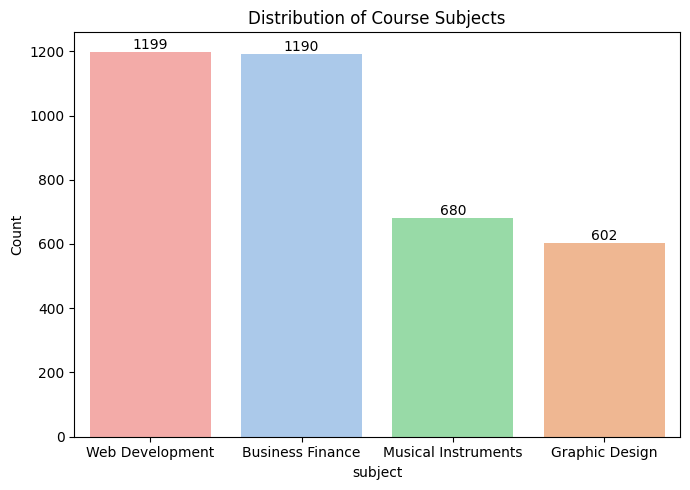

In [ ]:
def subjets_check(data, feature):
  plt.figure(figsize=(7,5))
  graph = sns.countplot(data=data,
                        x=feature,
                        palette='pastel',
                        order=data[feature].value_counts().index,
                        hue=feature,
                        legend=False)

  for bar in graph.containers:
    plt.bar_label(bar, label_type='edge')

  plt.xlabel(feature)
  plt.ylabel('Count')
  plt.title('Distribution of Course Subjects')

  plt.tight_layout()
  plt.show()

subjets_check(cleaned, 'subject')

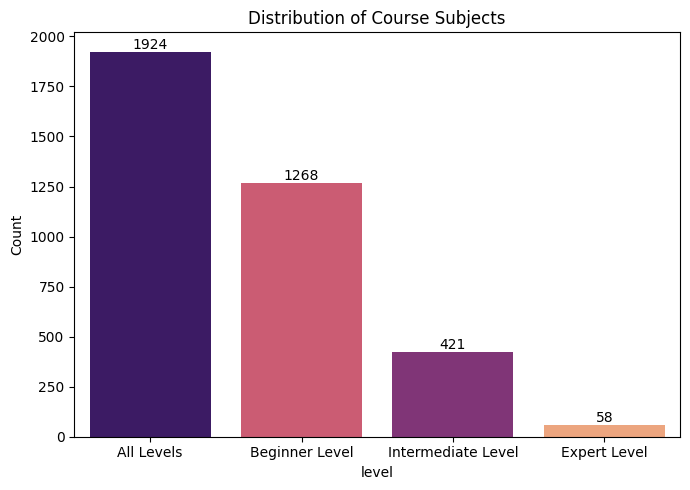

In [ ]:
def levels_check(data, feature):
  plt.figure(figsize=(7,5))
  graph = sns.countplot(data=data,
                        x=feature,
                        palette='magma',
                        order=data[feature].value_counts().index,
                        hue=feature,
                        legend=False)

  for bar in graph.containers:
    plt.bar_label(bar, label_type='edge')

  plt.xlabel(feature)
  plt.ylabel('Count')
  plt.title('Distribution of Course Subjects')

  plt.tight_layout()
  plt.show()

levels_check(cleaned, 'level')